# Assignment 2 - Machine Learning Practical
Due Date: Thursday February 26th @ 11:59 PM on blackboard

The goal of this assignment is to experiment with your previous Linear Regression and Logistic regression models to explore some of the practical skills previously covered in the course:
- Learning curves
- Regularization
- Model selection

For this assignment, you are given some boilerplate code in the form of a jupyter notebook. Your task is to fill in the blanks.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import sklearn.model_selection
import sklearn

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

def logistic_regression(num_inputs, regularization, learning_rate):
  model = Sequential()
  model.add(Dense(1, input_shape=(num_inputs,), activation='sigmoid', kernel_regularizer=l2(regularization)))
  model.compile(optimizer=SGD(learning_rate), loss='binary_crossentropy', metrics=['acc', keras.metrics.binary_crossentropy])
  return model

Using TensorFlow backend.


In [2]:
# This cell loads the data
import pandas as pd
import numpy as np
from sklearn import datasets
dataset = sklearn.datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


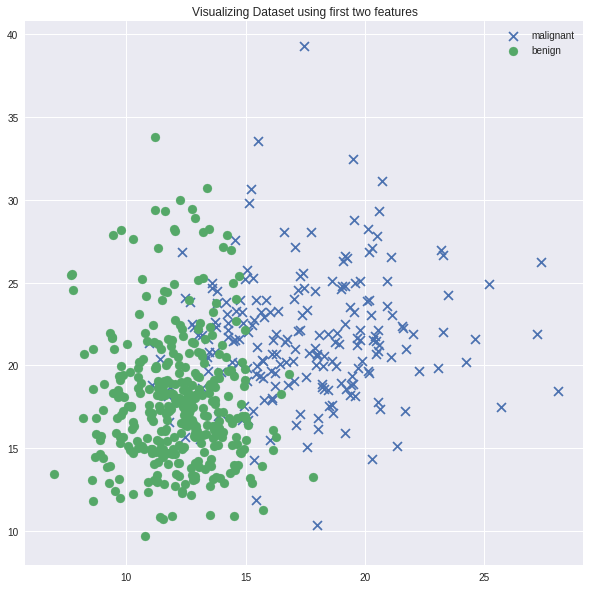

In [3]:
# This cell visualizes the first two features of the dataset. There are actually 30 features.
f, ax = plt.subplots(1,1, figsize=(10, 10))
malignant = X[y == 0]
benign = X[y == 1]
ax.scatter(malignant[:, 0], malignant[:, 1], marker='x', s=80, label='malignant')
ax.scatter(benign[:, 0], benign[:, 1], marker='o', s=80, label='benign')
ax.set_title("Visualizing Dataset using first two features")
ax.legend();

In [4]:
# This code creates a logistic regression model to train on the first two inputs features, with 0 regularization, and a learning rate of 0.0001
# See the keras documentation for how to use model.fit
# https://keras.io/models/model/#fit

model = logistic_regression(num_inputs=2, regularization=0, learning_rate=0.0001)
history = model.fit(X[:, [0,1]], y, epochs=5, batch_size=16, validation_split=0.2)

# The fit function returns a 'history' object that contains the metrics tracked during training

print('validation accuracy', history.history['val_acc'])
print('training accuracy', history.history['acc'])
print("These are the different metrics you can extract from the history object:", history.history.keys())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 455 samples, validate on 114 samples
Epoch 1/5
455/455 [==============================] - 0s 374us/step - loss: 6.1339 - acc: 0.5912 - binary_crossentropy: 6.1339 - val_loss: 3.5211 - val_acc: 0.7719 - val_binary_crossentropy: 3.5211
Epoch 2/5
455/455 [==============================] - 0s 78us/step - loss: 6.0758 - acc: 0.5912 - binary_crossentropy: 6.0758 - val_loss: 3.4717 - val_acc: 0.7719 - val_binary_crossentropy: 3.4717
Epoch 3/5
455/455 [==============================] - 0s 78us/step - loss: 6.0005 - acc: 0.5912 - binary_crossentropy: 6.0005 - val_loss: 3.4146 - val_acc: 0.7719 - val_binary_crossentropy: 3.4146
Epoch 4/5
455/455 [==============================] - 0s 74us/step - loss: 5.9046 - acc: 0.5912 - binary_crossentropy: 5.9046 - val_loss: 3.3521 - val_acc: 0.7719 - val_binary_crossentropy: 3.3521
Epoch 5/5
455/455 [==============================

In [0]:
# Create polynomial features
poly = sklearn.preprocessing.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split into training and validation data
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_poly, y)

In [6]:
# You should use X_train, y_train and X_val, y_val from now on, for your training set/validation sets respectively
X_train.shape
# y_train.shape - 426

(426, 496)

In [0]:
# Normalize your data IN THIS CELL by subtracting the mean and dividing by the standard deviation.
# Normalize it in place (so use the same variable names X_train, X_val, etc)

# X_train = sklearn.preprocessing.normalize(X_train, axis=0)
# X_val = sklearn.preprocessing.normalize(X_val, axis=0)
mean_train = np.mean(X_train, 0);
std_train = np.std(X_train, 0);

X_train = np.divide(X_train - mean_train, std_train, out=np.zeros_like(X_train - mean_train), where=std_train!=0);
X_val = np.divide(X_val - mean_train, std_train, out=np.zeros_like(X_val - mean_train), where=std_train!=0);

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 0s 380us/step - loss: 0.4018 - acc: 0.9225 - binary_crossentropy: 0.4018 - val_loss: 0.1734 - val_acc: 0.9650 - val_binary_crossentropy: 0.1734
Epoch 2/50
426/426 [==============================] - 0s 59us/step - loss: 0.1870 - acc: 0.9718 - binary_crossentropy: 0.1870 - val_loss: 0.2424 - val_acc: 0.9580 - val_binary_crossentropy: 0.2424
Epoch 3/50
426/426 [==============================] - 0s 54us/step - loss: 0.1589 - acc: 0.9742 - binary_crossentropy: 0.1589 - val_loss: 0.1793 - val_acc: 0.9650 - val_binary_crossentropy: 0.1793
Epoch 4/50
426/426 [==============================] - 0s 51us/step - loss: 0.1439 - acc: 0.9742 - binary_crossentropy: 0.1439 - val_loss: 0.3282 - val_acc: 0.9510 - val_binary_crossentropy: 0.3282
Epoch 5/50
426/426 [==============================] - 0s 50us/step - loss: 0.1622 - acc: 0.9718 - binary_crossentropy: 0.1622 - val_loss: 0.1821 - val_acc: 0.9720 - 

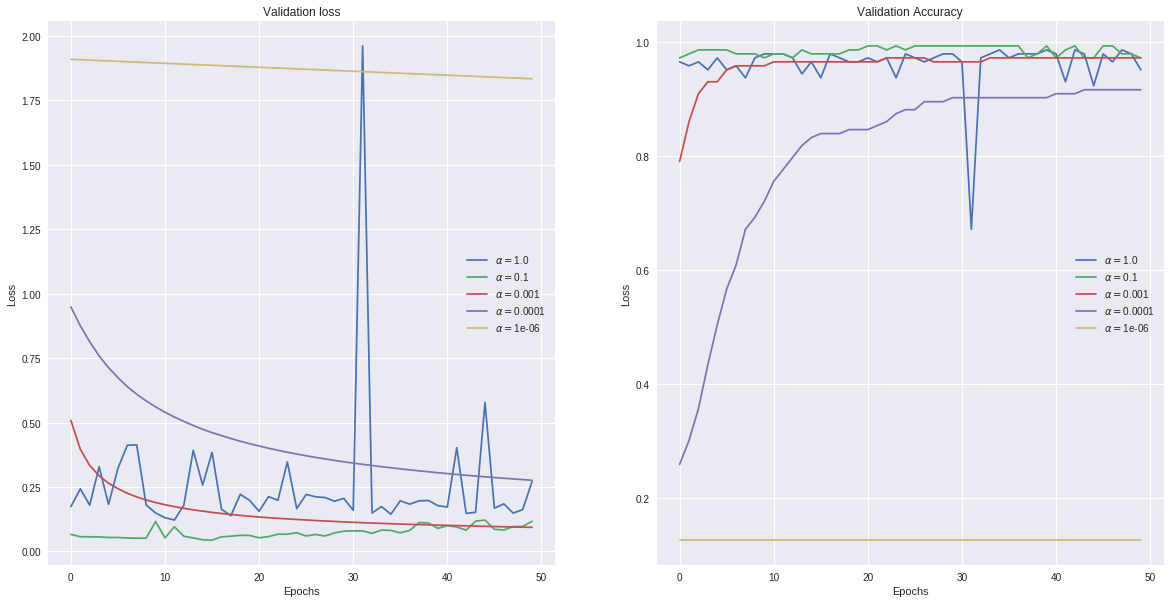

In [8]:
# Train 5 logistic regression models in a for loop on this data with, with 0 regularization, and vary the value of the learning rate using the values 1.0, 0.1, 0.001, 0.0001, 0.000001
# Use a batch size of 32
# Train for 50 epochs
# plot the validation loss for all 5 models on one plot, and the validation accuracy for all 5 models on a separate plot
# Modify the code IN THIS CELL for this task, you should replace the repeated code with a for loop

learning_rate = np.array([1.0, 0.1, 0.001, 0.0001, 0.000001]);
x_epochs = range(50);
features = X_train.shape[1]

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Validation loss");
ax[1].set_title("Validation Accuracy");

# Plot 5 curves on the same plot
for alpha in learning_rate:
  model = logistic_regression(num_inputs=features, regularization=0, learning_rate=alpha);
  history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.0, validation_data=(X_val, y_val));
  ax[0].plot(x_epochs, history.history['val_loss'], '',label=r'$\alpha = $' + str(alpha)) 
  ax[1].plot(x_epochs, history.history['val_acc'], '',label=r'$\alpha = $'+ str(alpha)) 
  
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend();

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();


Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 0s 930us/step - loss: 2.4453 - acc: 0.7723 - binary_crossentropy: 0.5240 - val_loss: 2.2870 - val_acc: 0.9091 - val_binary_crossentropy: 0.4234
Epoch 2/50
426/426 [==============================] - 0s 55us/step - loss: 2.2157 - acc: 0.8615 - binary_crossentropy: 0.3955 - val_loss: 2.1075 - val_acc: 0.9441 - val_binary_crossentropy: 0.3416
Epoch 3/50
426/426 [==============================] - 0s 52us/step - loss: 2.0642 - acc: 0.8897 - binary_crossentropy: 0.3394 - val_loss: 1.9667 - val_acc: 0.9371 - val_binary_crossentropy: 0.2926
Epoch 4/50
426/426 [==============================] - 0s 52us/step - loss: 1.9401 - acc: 0.9155 - binary_crossentropy: 0.3048 - val_loss: 1.8493 - val_acc: 0.9510 - val_binary_crossentropy: 0.2621
Epoch 5/50
426/426 [==============================] - 0s 51us/step - loss: 1.8316 - acc: 0.9202 - binary_crossentropy: 0.2811 - val_loss: 1.7459 - val_acc: 0.9580 - 

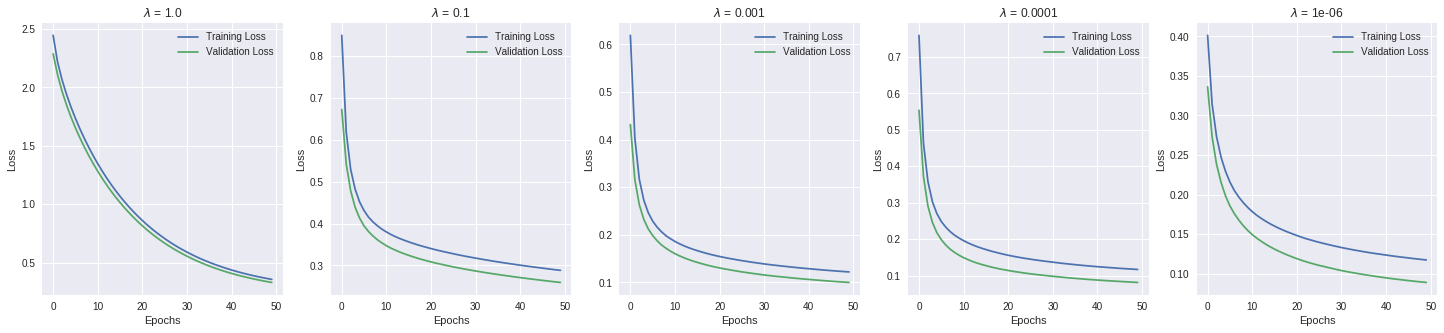

In [9]:
# Choose the best learning rate from the previous experiment

# Train 5 logistic regression models on this data with the following values for lambda: 1.0, 0.1, 0.001, 0.0001, 0.000001
# Plot your learning curve for each model (train and validation loss together, so 2 curves on each plot)
# Use a batch size of 32
# Train for 50 epochs
# Modify the code IN THIS CELL for this task

alpha = 0.001;        # Best learning rate
lambda_values = np.array([1.0, 0.1, 0.001, 0.0001, 0.000001]);
epochs = range(50);

f, ax = plt.subplots(1, 5, figsize=(25, 5));

i = 0;
for lambda_value in lambda_values:
  model = logistic_regression(num_inputs=features, regularization=lambda_value, learning_rate=alpha);
  history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.0, validation_data=(X_val, y_val));
  ax[i].plot(x_epochs, history.history['loss'], '',label=r'Training Loss');
  ax[i].plot(x_epochs, history.history['val_loss'], '',label=r'Validation Loss');
  ax[i].set_title('$\lambda$ = ' + str(lambda_value));
  ax[i].set_xlabel('Epochs');
  ax[i].set_ylabel('Loss');
  ax[i].legend();
  i = i+1;